In [9]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sns
import pickle

In [2]:
curr_dir = !pwd

hhalign_scores = pd.read_csv(curr_dir[0]+"/domains_hhlign_scores.csv", sep='\t', index_col=0)

## Remove domains from "no clan" that were accidentally calculated(!)

In [10]:
#Remove domains from "no clan" that were accidentally calculated
clan_path = curr_dir[0]+"/../../2.parse_Pfam/v30/"
with open(clan_path+"domain_to_clan_dict.pik", 'rb') as handle:
    domain_to_clan_dict = pickle.load(handle)
with open(clan_path+"clan_to_domains_dict.pik", 'rb') as handle:
    clan_to_domains_dict = pickle.load(handle)

In [18]:
drop_idx = []
for index, row in hhalign_scores.iterrows():
    clan1 = domain_to_clan_dict[row["sim_dom1"]]
    clan2 = domain_to_clan_dict[row["sim_dom2"]]
    if (clan1 == "No_clan" and clan2 == "No_clan"):
        drop_idx.append(index)

In [25]:
hhalign_scores_filtered_no_clan = hhalign_scores.drop(drop_idx)
hhalign_scores_filtered_no_clan = hhalign_scores_filtered_no_clan.reset_index(drop=True)

### Check the scores distribution to determine a threshold for similarity

In [29]:
h = np.histogram(hhalign_scores_filtered_no_clan["scores"])

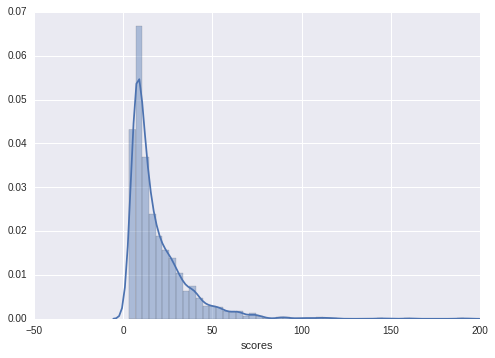

In [30]:
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
sns.distplot(hhalign_scores_filtered_no_clan["scores"]);

This distribution is only of similarity scores within clans, so they are already pretty high and not represnting similarity between two random domains.

In [33]:
hhalign_scores.columns

Index([u'index', u'sim_dom1', u'sim_dom2', u'scores', u'p-values'], dtype='object')

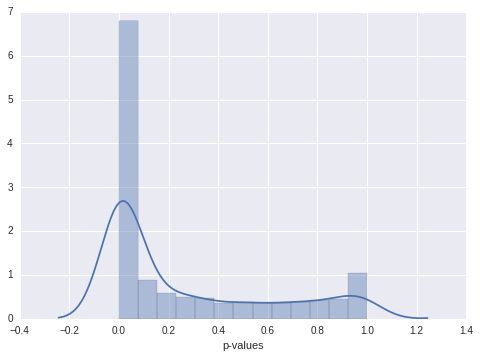

In [31]:
sns.distplot(hhalign_scores_filtered_no_clan["p-values"]);

In [32]:
np.percentile(hhalign_scores_filtered_no_clan["scores"], 99)

77.001999999999981

In [33]:
np.sum(hhalign_scores_filtered_no_clan["scores"] >= 40)

161

In [34]:
np.percentile(hhalign_scores_filtered_no_clan["p-values"], 10)

1.0680000000000178e-14

0.001 p-value is the diffault threshold for Viterbi:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3197634/

In [35]:
np.sum(hhalign_scores_filtered_no_clan["p-values"] <= 0.001)

538

In [36]:
np.percentile(hhalign_scores_filtered_no_clan[hhalign_scores_filtered_no_clan["p-values"] <= 0.001]["scores"], 45)

29.829499999999996

HHalign Viterbi score >= 11 like the threshold used in: https://academic.oup.com/nar/article/45/W1/W470/3782606

In [43]:
significantly_similar_pairs = hhalign_scores_filtered_no_clan[hhalign_scores_filtered_no_clan["p-values"] <= 0.001][hhalign_scores_filtered_no_clan["scores"] >= 11]
significantly_similar_pairs.reset_index(inplace=True, drop=True)

In [42]:
significantly_similar_pairs.to_csv("sig_pairs_pval0.001_score11.csv", sep='\t')

In [41]:
significantly_similar_pairs

,index,sim_dom1,sim_dom2,scores,p-values
0,331,Hydrolase_4,Abhydrolase_6,64.54,2.100000e-09
1,340,Hydrolase_4,Abhydrolase_1,106.22,2.800000e-16
2,506,Abhydrolase_6,Abhydrolase_1,62.74,5.500000e-10
3,577,S1,CSD,21.23,1.100000e-04
4,1001,Guanylate_kin,AAA_33,27.34,6.000000e-04
5,1026,Guanylate_kin,AAA_5,26.90,8.600000e-04
6,1039,Guanylate_kin,MMR_HSR1,27.41,4.800000e-04
7,1052,Guanylate_kin,AAA_18,27.28,3.100000e-04
8,1176,DEAD,Microtub_bd,27.49,7.700000e-04
9,1184,DEAD,SNF2_N,45.11,4.600000e-06


In [44]:
pd.DataFrame.append(significantly_similar_pairs[significantly_similar_pairs["sim_dom1"] == "zf-C2H2"], significantly_similar_pairs[significantly_similar_pairs["sim_dom2"] == "zf-C2H2"])

,index,sim_dom1,sim_dom2,scores,p-values
459,7507821,zf-C2H2,zf-met,35.68,2.400000e-36
432,7507688,zf-C2H2_4,zf-C2H2,39.60,5.200000e-38
439,7507705,zf-C2H2_6,zf-C2H2,40.11,4.300000e-22
445,7507736,zf-H2C2_5,zf-C2H2,38.14,2.100000e-16
450,7507763,zf-H2C2_2,zf-C2H2,23.37,5.400000e-11
454,7507786,zf-C2H2_jaz,zf-C2H2,33.81,3.400000e-15
457,7507796,zf-BED,zf-C2H2,24.72,4.900000e-08
